In [38]:
import pandas as pd

netflix = pd.read_csv("netflix_titles 4.csv")
prime = pd.read_csv("amazon_prime_titles.csv")
disney = pd.read_csv("disney_plus_titles.csv")
hulu = pd.read_csv("hulu_titles.csv")

print("Netflix:\n", netflix.head(2),"\n")
print("Amazon Prime:\n", prime.head(2),"\n")
print("Disney+:\n",disney.head(2),"\n")
print("Hulu:\n", hulu.head(2),"\n")
      

Netflix:
   show_id     type                 title         director  \
0      s1    Movie  Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show         Blood & Water              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   

                                         listed_in  \
0                                    Documentaries   
1  International TV Shows, TV Dramas, TV Mysteries   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...   

Amazon Prime:
   show_id   type                 title      director  \
0      s1  Movie   

In [39]:
netflix['platform'] = 'Netflix'
prime['platform'] = 'Amazon Prime'
disney['platform'] ='Disney+' 
hulu['platform']= 'Hulu'

In [41]:
for df in [netflix, prime, disney, hulu]:
    df['date_added'] = pd.to_datetime(df['date_added'], errors = 'coerce')

In [42]:
for df in [netflix, prime, disney, hulu]:
    df['director'].fillna('Unknown', inplace=True)
    df['cast'].fillna('Unknown', inplace=True)
    df['country'].fillna('Unknown', inplace=True)
    df['rating'].fillna('Unknown', inplace=True)
    df['duration'].fillna('Unknown', inplace=True)
    df['description'].fillna('No description available', inplace=True)

/var/folders/d0/scchsbvx1wn_dr7brr0knbph0000gn/T/ipykernel_72268/1786322440.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['cast'].fillna('Unknown', inplace=True)


In [43]:
# STEP 3: Fix datatypes + fill missing values
for df in [netflix, prime, disney, hulu]:
    df['director'] = df['director'].astype(str)
    df['cast'] = df['cast'].astype(str)
    df['country'] = df['country'].astype(str)
    df['rating'] = df['rating'].astype(str)
    df['duration'] = df['duration'].astype(str)
    df['description'] = df['description'].astype(str)

    df['director'].fillna('Unknown', inplace=True)
    df['cast'].fillna('Unknown', inplace=True)
    df['country'].fillna('Unknown', inplace=True)
    df['rating'].fillna('Unknown', inplace=True)
    df['duration'].fillna('Unknown', inplace=True)
    df['description'].fillna('No description available', inplace=True)


In [44]:
# STEP 5: Merge all streaming platform datasets into one DataFrame and we call it 'all_streaming_df'
all_streaming_df = pd.concat([netflix, prime, disney, hulu], ignore_index=True)


In [45]:
# Show number of rows and columns
print("✅ Combined shape:", all_streaming_df.shape)

# Show count of entries per platform
print("\n🎥 Titles per platform:\n", all_streaming_df['platform'].value_counts())

# Show first 2 rows of the combined dataset
all_streaming_df.head(2)


✅ Combined shape: (22998, 13)

🎥 Titles per platform:
 platform
Amazon Prime    9668
Netflix         8807
Hulu            3073
Disney+         1450
Name: count, dtype: int64


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,platform
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Netflix
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Netflix


# NETFLIX EDA

In [46]:
netflix_df = all_streaming_df[all_streaming_df['platform']== 'Netflix']

In [47]:
print("missing values in Netflix:\n",netflix_df.isnull().sum())
print("\n Type values:", netflix_df['type'].unique())
print("\n Unique rating:", netflix_df['rating'].unique())
print("\n Top Duration values:\n", netflix_df['duration'].value_counts().head(10))
print("\n Sample genres from 'listed_in':\n", netflix_df['listed_in'].head(5).tolist())

missing values in Netflix:
 show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      98
release_year     0
rating           0
duration         0
listed_in        0
description      0
platform         0
dtype: int64

 Type values: ['Movie' 'TV Show']

 Unique rating: ['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' '74 min' '84 min' '66 min' 'NR' 'Unknown' 'TV-Y7-FV' 'UR']

 Top Duration values:
 duration
1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
97 min        146
93 min        146
91 min        144
95 min        137
96 min        130
Name: count, dtype: int64

 Sample genres from 'listed_in':
 ['Documentaries', 'International TV Shows, TV Dramas, TV Mysteries', 'Crime TV Shows, International TV Shows, TV Action & Adventure', 'Docuseries, Reality TV', 'International TV Shows, Romantic TV Shows, TV Comedies']


In [49]:
# STEP: Split duration into numeric value + unit (e.g., 90 + 'min' or 2 + 'Seasons')

# first we create two new columns: duration_int and duration_type
netflix_df.loc[:,'duration_int'] = netflix_df['duration'].str.extract('(\d+)')     # extract number only
netflix_df.loc[:,'duration_type'] = netflix_df['duration'].str.extract('([a-zA-Z]+)')  # extract text (min or Season)

# Convert duration_int to numeric type
netflix_df.loc[:,'duration_int'] = pd.to_numeric(netflix_df['duration_int'], errors='coerce')


In [25]:
netflix_df[['title','type','duration','duration_int','duration_type']].head(10)


,title,type,duration,duration_int,duration_type
0,Dick Johnson Is Dead,Movie,90 min,NaN,NaN
1,Blood & Water,TV Show,2 Seasons,NaN,NaN
2,Ganglands,TV Show,1 Season,NaN,NaN
3,Jailbirds New Orleans,TV Show,1 Season,NaN,NaN
4,Kota Factory,TV Show,2 Seasons,NaN,NaN
5,Midnight Mass,TV Show,1 Season,NaN,NaN
6,My Little Pony: A New Generation,Movie,91 min,NaN,NaN
7,Sankofa,Movie,125 min,NaN,NaN
8,The Great British Baking Show,TV Show,9 Seasons,NaN,NaN
9,The Starling,Movie,104 min,NaN,NaN


In [50]:
# Re-extract with more flexible regex (handles spaces properly)
netflix_df.loc[:, 'duration_int'] = netflix_df['duration'].str.extract(r'(\d+)')
netflix_df.loc[:, 'duration_type'] = netflix_df['duration'].str.extract(r'([a-zA-Z]+(?:\s[a-zA-Z]+)?)')

# Convert to numeric
netflix_df.loc[:, 'duration_int'] = pd.to_numeric(netflix_df['duration_int'], errors='coerce')


In [27]:
netflix_df[['title','type','duration','duration_int','duration_type']].head(10)


,title,type,duration,duration_int,duration_type
0,Dick Johnson Is Dead,Movie,90 min,NaN,NaN
1,Blood & Water,TV Show,2 Seasons,NaN,NaN
2,Ganglands,TV Show,1 Season,NaN,NaN
3,Jailbirds New Orleans,TV Show,1 Season,NaN,NaN
4,Kota Factory,TV Show,2 Seasons,NaN,NaN
5,Midnight Mass,TV Show,1 Season,NaN,NaN
6,My Little Pony: A New Generation,Movie,91 min,NaN,NaN
7,Sankofa,Movie,125 min,NaN,NaN
8,The Great British Baking Show,TV Show,9 Seasons,NaN,NaN
9,The Starling,Movie,104 min,NaN,NaN


In [28]:
netflix_df['duration'].unique()[:20]


array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min'], dtype=object)

In [51]:
# Split 'duration' column by space into number and unit
netflix_df[['duration_int', 'duration_type']] = netflix_df['duration'].str.split(' ', expand=True)

# Convert to numeric
netflix_df['duration_int'] = pd.to_numeric(netflix_df['duration_int'], errors='coerce')


/var/folders/d0/scchsbvx1wn_dr7brr0knbph0000gn/T/ipykernel_72268/3139944941.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_df[['duration_int', 'duration_type']] = netflix_df['duration'].str.split(' ', expand=True)
/var/folders/d0/scchsbvx1wn_dr7brr0knbph0000gn/T/ipykernel_72268/3139944941.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_df['duration_int'] = pd.to_numeric(netflix_df['duration_int'], errors='coerce')


In [53]:
netflix_df[['title', 'type', 'duration', 'duration_int', 'duration_type']].head(10)


,title,type,duration,duration_int,duration_type
0,Dick Johnson Is Dead,Movie,90 min,90.0,min
1,Blood & Water,TV Show,2 Seasons,2.0,Seasons
2,Ganglands,TV Show,1 Season,1.0,Season
3,Jailbirds New Orleans,TV Show,1 Season,1.0,Season
4,Kota Factory,TV Show,2 Seasons,2.0,Seasons
5,Midnight Mass,TV Show,1 Season,1.0,Season
6,My Little Pony: A New Generation,Movie,91 min,91.0,min
7,Sankofa,Movie,125 min,125.0,min
8,The Great British Baking Show,TV Show,9 Seasons,9.0,Seasons
9,The Starling,Movie,104 min,104.0,min


 #Movies vs TV Shows on Netflix

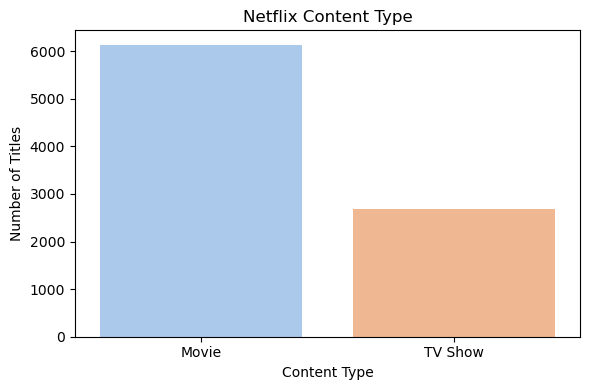

In [54]:
import seaborn as sns 
import matplotlib.pyplot as plt

type_counts = netflix_df['type'].value_counts()

plt.figure(figsize= (6,4))
sns.barplot(x=type_counts.index, y=type_counts.values,palette='pastel')

plt.title('Netflix Content Type')
plt.xlabel('Content Type')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.savefig('netflix_content_type.png')
plt.show ()

#STEP 2.5 – Top Netflix Genres (from listed_in)

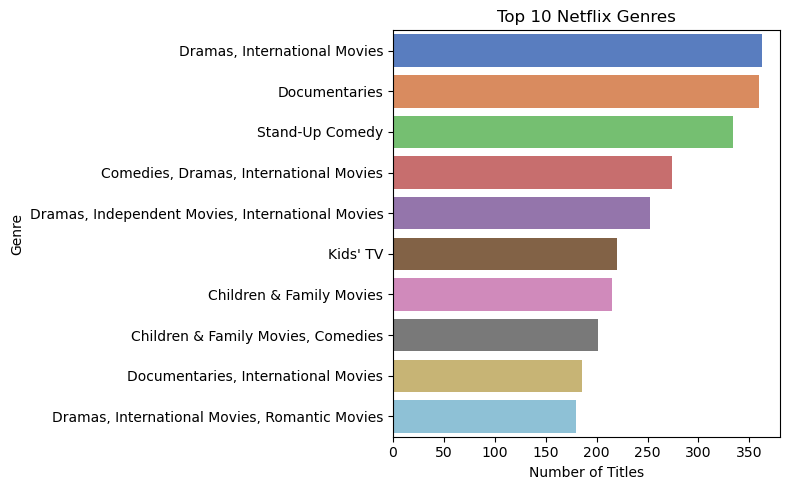

In [55]:
all_genres = netflix_df['listed_in'].dropna().str.split(' , ').explode()

top_genres = all_genres.value_counts().head(10)

import matplotlib.pyplot as plt
import seaborn as sns 

plt.figure(figsize = (8,5))
sns.barplot(x=top_genres.values, y =top_genres.index, palette = 'muted')

plt.title('Top 10 Netflix Genres')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.tight_layout()
plt.savefig('netflix_top_genres.png')
plt.show()

In [56]:
#Ratings Breakdown (Netflix Content Maturity)

import pandas as pd
netflix_df = pd.read_csv('netflix_titles 4.csv')

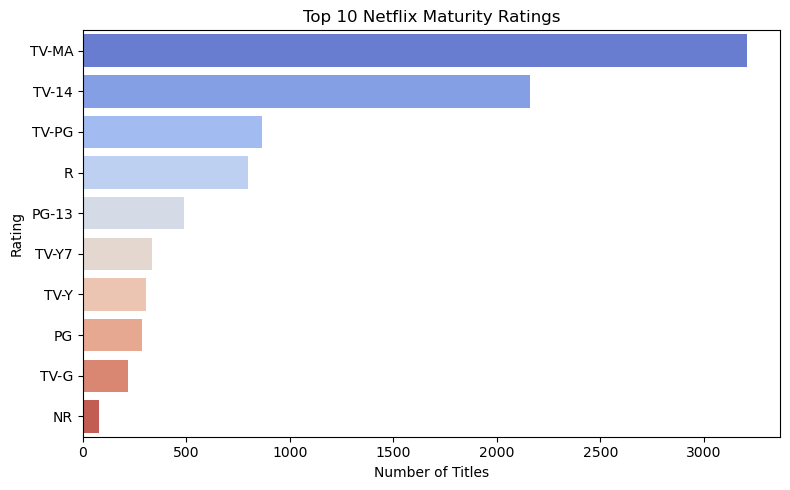

In [57]:
rating_counts = netflix_df['rating'].value_counts().head(10)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (8,5))
sns.barplot(x=rating_counts.values, y=rating_counts.index, palette ='coolwarm')

plt.title('Top 10 Netflix Maturity Ratings')
plt.xlabel('Number of Titles')
plt.ylabel('Rating')
plt.tight_layout()
plt.savefig('netflix_Rating_distribution.png')
plt.show()

In [ ]:
#Duration Breakdown (Netflix Content Length)

In [58]:
# Re-extract duration_int column
netflix_df[['duration_int', 'duration_type']] = netflix_df['duration'].str.split(' ', expand=True)

# Convert duration_int to numeric
netflix_df['duration_int'] = pd.to_numeric(netflix_df['duration_int'], errors='coerce')


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


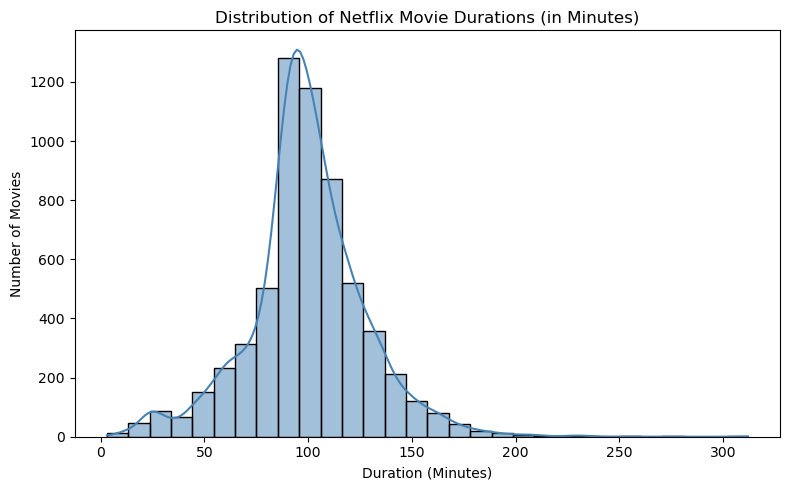

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Split Movie and TV Show
movies = netflix_df[netflix_df['type'] == 'Movie']
tv_shows = netflix_df[netflix_df['type'] == 'TV Show']


plt.figure(figsize=(8, 5))
sns.histplot(data=movies, x='duration_int', bins=30, kde=True, color='steelblue')
plt.title('Distribution of Netflix Movie Durations (in Minutes)')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.savefig('netflix_movie_durations.png')  # ✅ Save chart
plt.show()


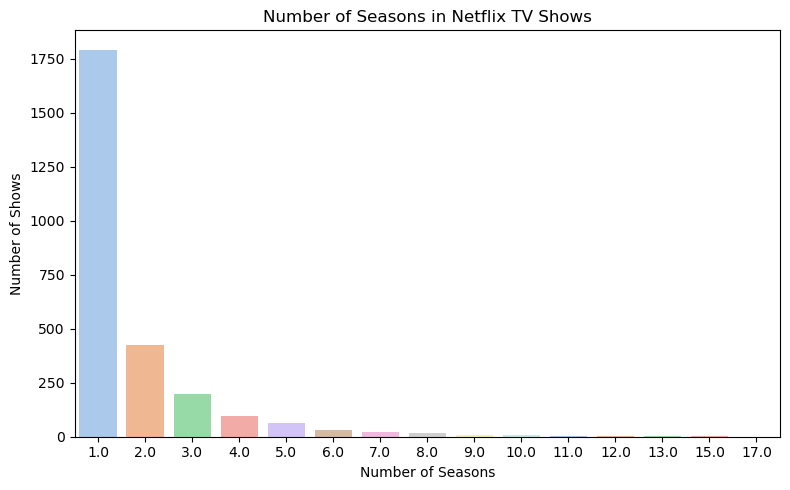

In [59]:
# TV Show Season Analysis


tv_shows = netflix_df[netflix_df['type'] == 'TV Show']


season_counts = tv_shows['duration_int'].value_counts().sort_index()


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x=season_counts.index, y=season_counts.values, palette='pastel')

plt.title('Number of Seasons in Netflix TV Shows')
plt.xlabel('Number of Seasons')
plt.ylabel('Number of Shows')
plt.tight_layout()
plt.savefig('netflix_tv_show_seasons.png')  # ✅ Save chart
plt.show()


Sentiment/Theme Analysis

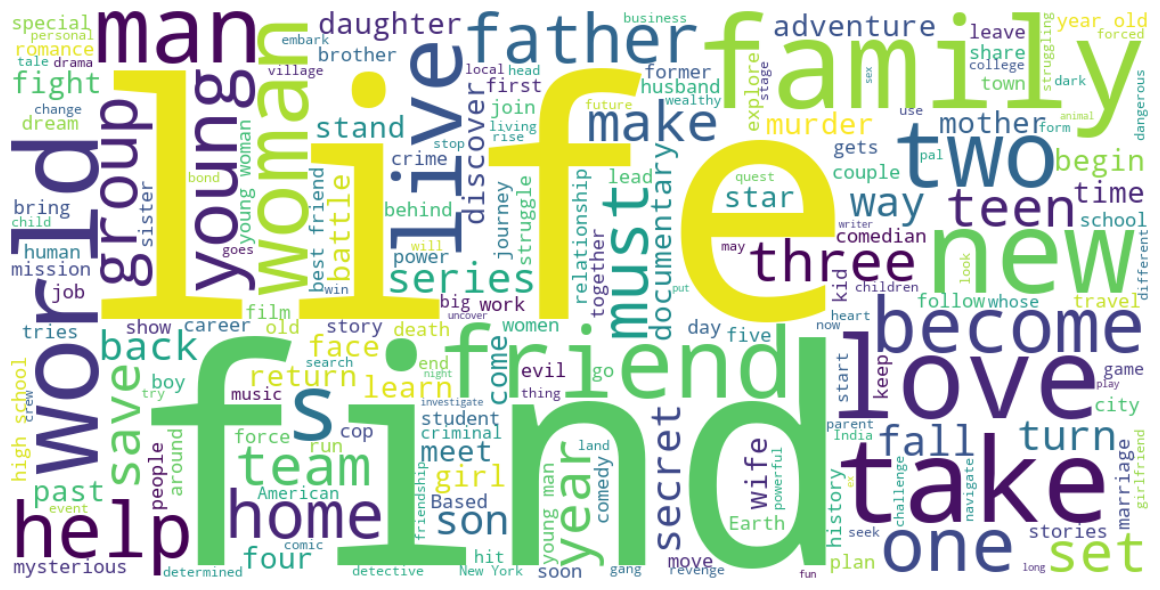

In [61]:
!pip install wordcloud

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Step 1: Drop rows with no description
descriptions = netflix_df['description'].dropna()

# Step 2: Combine all descriptions into one big string
text = " ".join(descriptions)

# Step 3: Create a WordCloud object
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=1000, height=500, background_color='white', stopwords=stopwords, colormap='viridis').generate(text)

# Step 4: Plot the WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.savefig('netflix_description_wordcloud.png')  # ✅ Save chart
plt.show()


In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


df_model = netflix_df[['type','rating','duration_int','listed_in']].dropna()
le_rating=LabelEncoder()
le_genre= LabelEncoder()

df_model['rating'] = le_rating.fit_transform(df_model['rating'])
df_model['listed_in'] = le_genre.fit_transform(df_model['listed_in'])

x=df_model[['rating','duration_int','listed_in']]     #Features what model will look at
y= df_model['type']    #target -whay model should learn to predict 0 or 1

# split in training and testing 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print("Prediction Accuracy:",accuracy)


Prediction Accuracy: 0.9982954545454545


##Comparative Analysis Across Platforms

In [63]:
# Re-create combined dataframe if not already done
all_streaming_df = pd.concat([netflix, prime, disney, hulu], ignore_index=True)


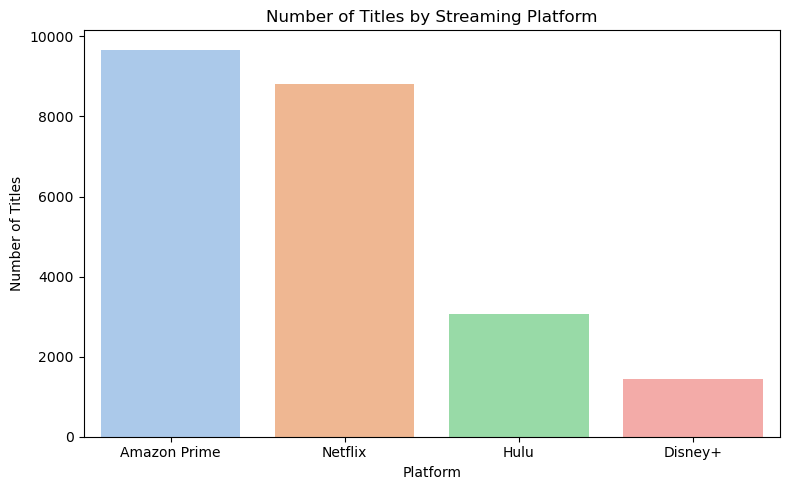

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

platform_counts = all_streaming_df['platform'].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x=platform_counts.index, y= platform_counts.values, palette ='pastel')

plt.title('Number of Titles by Streaming Platform')
plt.xlabel('Platform')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.savefig('platform_title_counts.png')
plt.show()

In [ ]:
#Top 10 Genres Across All Platforms

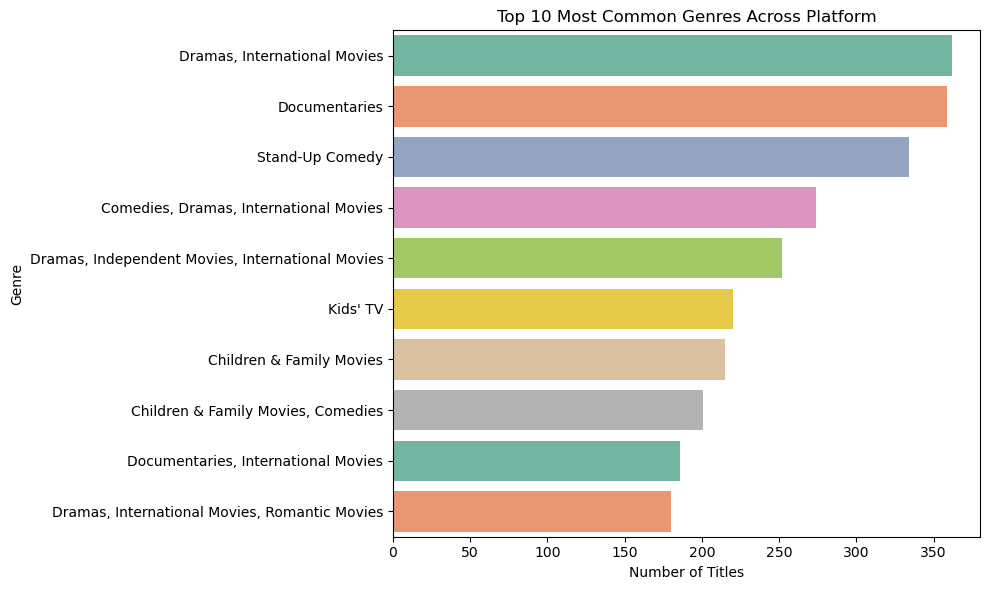

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns

all_genres = all_streaming_df['listed_in'].dropna().str.split(', ').explode()
top_genres - all_genres.value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette ='Set2')
plt.title('Top 10 Most Common Genres Across Platform')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.tight_layout()
plt.savefig('top_genres_all_Platforms')

plt.show()


Genre Distribution by Platform

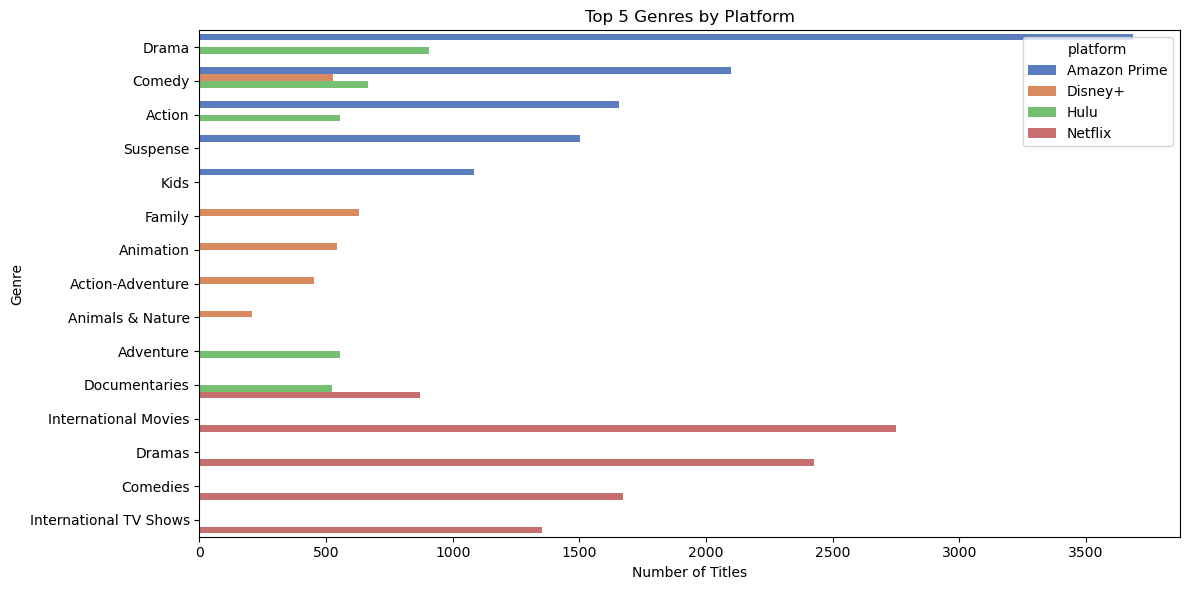

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Explode genres across all platforms
exploded_df = all_streaming_df.dropna(subset=['listed_in'])
exploded_df = exploded_df.assign(listed_in=exploded_df['listed_in'].str.split(', '))
exploded_df = exploded_df.explode('listed_in')


exploded_df['listed_in'] = exploded_df['listed_in'].str.strip()
platform_genre_counts = exploded_df.groupby(['platform', 'listed_in']).size().reset_index(name='count')

# Pick top 5 genres for each platform
top_platform_genres = platform_genre_counts.groupby('platform').apply(
    lambda x: x.sort_values('count', ascending=False).head(5)
).reset_index(drop=True)

plt.figure(figsize=(12,6))
sns.barplot(data=top_platform_genres, x='count', y='listed_in', hue='platform', palette='muted')
plt.title('Top 5 Genres by Platform')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.tight_layout()
plt.savefig('platform_genre_comparison.png')
plt.show()


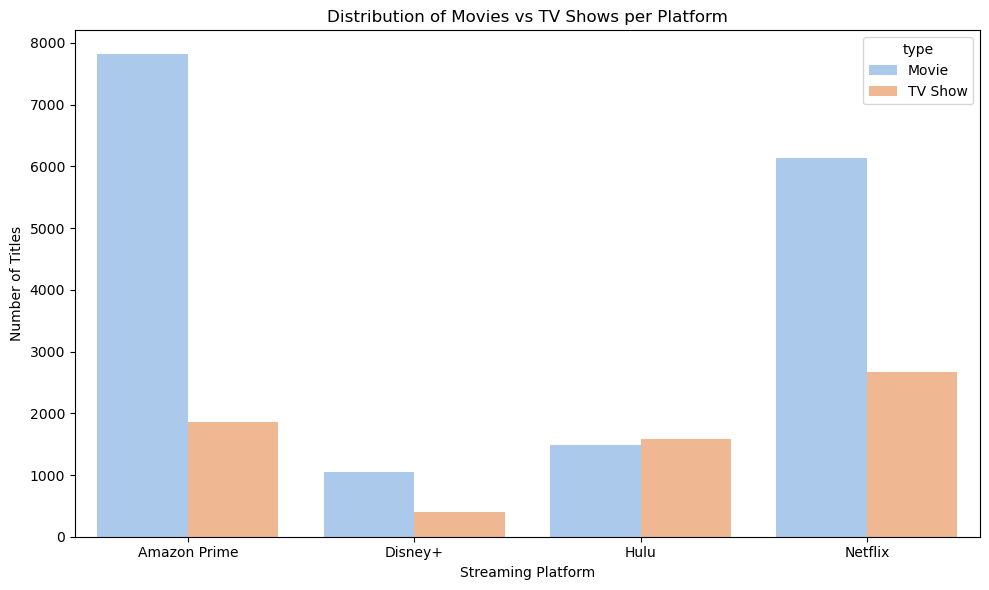

In [77]:
# STEP 3.3 – Content Type Distribution (Movies vs TV Shows) by Platform

import seaborn as sns
import matplotlib.pyplot as plt

# Group by platform and content type, then count
type_platform_counts = all_streaming_df.groupby(['platform', 'type']).size().reset_index(name='count')
# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=type_platform_counts, x='platform', y='count', hue='type', palette='pastel')

# Labels and Title
plt.title('Distribution of Movies vs TV Shows per Platform')
plt.xlabel('Streaming Platform')
plt.ylabel('Number of Titles')
plt.tight_layout()

# Save chart
plt.savefig('platform_content_type_distribution.png')
plt.show()


In [ ]:
#Trends (Release Years Distribution)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


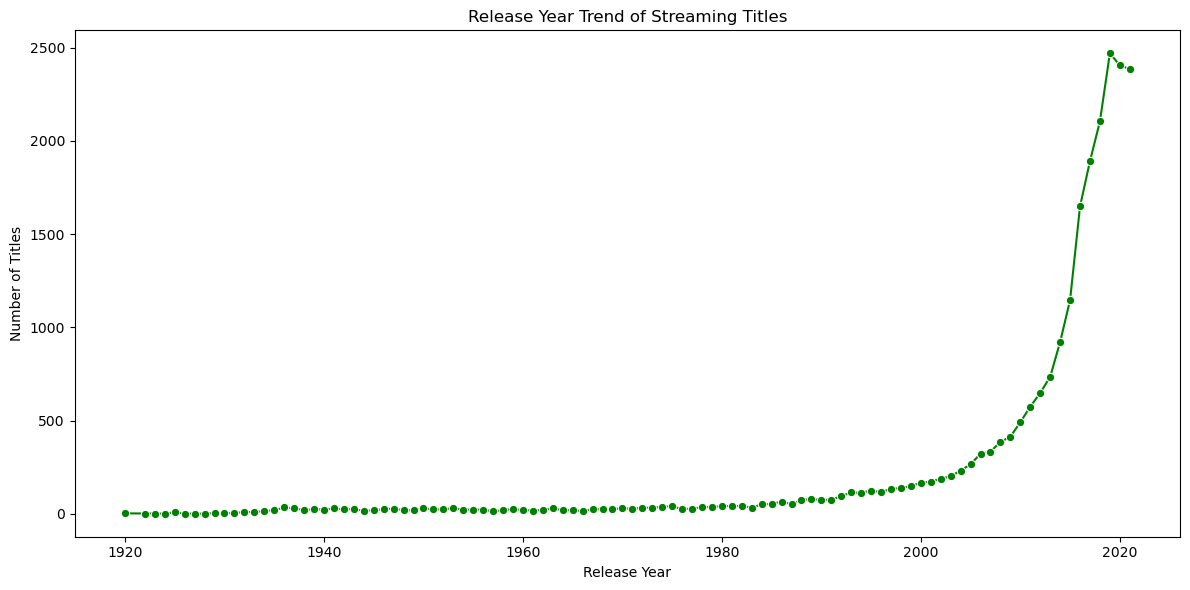

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop missing years and count releases per year
yearly_counts = all_streaming_df.dropna(subset=['release_year'])
yearly_counts = yearly_counts.groupby('release_year').size().reset_index(name='count')


plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_counts, x='release_year', y='count', marker='o', color='green')

plt.title('Release Year Trend of Streaming Titles')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.savefig('release_year_trend.png')  
plt.show()


#Rating Distribution by Platform

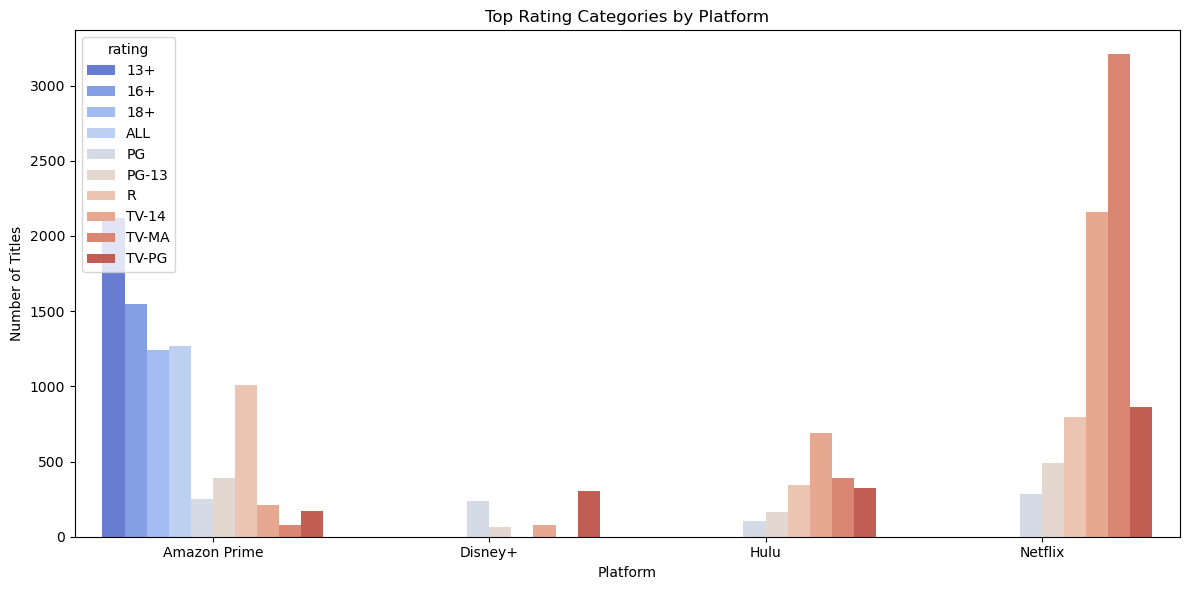

In [81]:
# Get top 10 most frequent ratings
top_ratings = all_streaming_df['rating'].value_counts().nlargest(10).index

# Filter for top ratings only
filtered_df = all_streaming_df[all_streaming_df['rating'].isin(top_ratings)]

# Group and plot
rating_platform_counts = filtered_df.groupby(['platform','rating']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(data=rating_platform_counts, x='platform', y='count', hue='rating', palette='coolwarm')
plt.title('Top Rating Categories by Platform')
plt.xlabel('Platform')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.savefig('Platform_rating_distribution_top10.png')
plt.show()
